In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.layers import Dense , Dropout
from scikeras.wrappers import KerasRegressor 
from tensorflow.keras.callbacks import EarlyStopping
import time
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import GridSearchCV

In [2]:
#data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/TPath_300_finish_data.pkl')
data = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_ALL_D4_t_I_F_PKL.pkl')
data2 = pd.read_pickle('C:/Users/erikm/Desktop/Diplomarbeit Erik Marr/Daten/Finish/Finish_D4_t_I8000_F5000_Vorhersage/TPathI8000F5000_298_finish_data_D4.pkl')
data2  

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.0000,-0.00200,298,8000,5000,803.83
1,0.0000,-0.00192,298,8000,5000,909.88
2,0.0000,-0.00184,298,8000,5000,1020.90
3,0.0000,-0.00176,298,8000,5000,1137.00
4,0.0000,-0.00168,298,8000,5000,1252.30
...,...,...,...,...,...,...
1066,0.0024,0.00168,298,8000,5000,1154.30
1067,0.0024,0.00176,298,8000,5000,1058.10
1068,0.0024,0.00184,298,8000,5000,956.50
1069,0.0024,0.00192,298,8000,5000,850.84


In [3]:
data.describe()


,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
count,351288.000000,3.512880e+05,351288.000000,351288.000000,351288.000000,351288.000000
mean,0.001200,8.187503e-20,300.000000,7250.000000,6125.000000,1223.062798
std,0.000727,1.177570e-03,118.321764,968.247215,1268.613251,481.699573
min,0.000000,-2.000000e-03,100.000000,6000.000000,5000.000000,359.280000
25%,0.000600,-1.040000e-03,200.000000,6750.000000,5000.000000,815.900000
50%,0.001200,4.529900e-18,300.000000,7000.000000,6000.000000,1136.800000
75%,0.001800,1.040000e-03,400.000000,8000.000000,6250.000000,1617.400000
max,0.002400,2.000000e-03,500.000000,9000.000000,9000.000000,2577.200000


In [4]:
#df = data.sample(frac=1, random_state=42)  # Hier wird 42 als Random State verwendet, um die Ergebnisse reproduzierbar zu machen
df_reset = data.reset_index(drop=True)
df_reset

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.0000,-0.00200,100,6000,5000,449.80
1,0.0000,-0.00192,100,6000,5000,479.76
2,0.0000,-0.00184,100,6000,5000,506.60
3,0.0000,-0.00176,100,6000,5000,530.80
4,0.0000,-0.00168,100,6000,5000,552.15
...,...,...,...,...,...,...
351283,0.0024,0.00168,500,9000,5000,1365.50
351284,0.0024,0.00176,500,9000,5000,1247.20
351285,0.0024,0.00184,500,9000,5000,1114.10
351286,0.0024,0.00192,500,9000,5000,983.97


In [59]:
df_reset2 = data2.reset_index(drop=True)
df_reset2

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft,Temperatur
0,0.0000,-0.00200,298,8000,5000,803.83
1,0.0000,-0.00192,298,8000,5000,909.88
2,0.0000,-0.00184,298,8000,5000,1020.90
3,0.0000,-0.00176,298,8000,5000,1137.00
4,0.0000,-0.00168,298,8000,5000,1252.30
...,...,...,...,...,...,...
1066,0.0024,0.00168,298,8000,5000,1154.30
1067,0.0024,0.00176,298,8000,5000,1058.10
1068,0.0024,0.00184,298,8000,5000,956.50
1069,0.0024,0.00192,298,8000,5000,850.84


In [60]:
label = df_reset["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df = df_reset.drop("Temperatur", axis=1)
X = df
y = label


In [61]:
label2 = df_reset2["Temperatur"]
# Korrektur: Verwenden Sie den Spaltennamen direkt, ohne Indexierung der columns-Eigenschaft
df2 = df_reset2.drop("Temperatur", axis=1)
X2 = df2
y2 = label2

In [62]:
X2

,X-Koordinate,Y-Koordinate,Zeitpunkt,Strom,Kraft
0,0.0000,-0.00200,298,8000,5000
1,0.0000,-0.00192,298,8000,5000
2,0.0000,-0.00184,298,8000,5000
3,0.0000,-0.00176,298,8000,5000
4,0.0000,-0.00168,298,8000,5000
...,...,...,...,...,...
1066,0.0024,0.00168,298,8000,5000
1067,0.0024,0.00176,298,8000,5000
1068,0.0024,0.00184,298,8000,5000
1069,0.0024,0.00192,298,8000,5000


In [63]:
y2

0        803.83
1        909.88
2       1020.90
3       1137.00
4       1252.30
         ...   
1066    1154.30
1067    1058.10
1068     956.50
1069     850.84
1070     740.15
Name: Temperatur, Length: 1071, dtype: float64

In [64]:
 # train_df enthält 80% der Daten, test_df enthält 20% der Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [65]:
# Initialisiere einen MinMaxScaler für die Features
scaler_features = MinMaxScaler()
# Skaliere X_train und X_test
X_train_scaled = scaler_features.fit_transform(X_train)
X_test_scaled = scaler_features.transform(X_test)  # Nutze unterschiedliche Skalierungsparameter
X_test_scaled_2 = scaler_features.transform(X2)
# Initialisiere einen SEPARATEN MinMaxScaler für das Ziel, wenn nötig
scaler_target = MinMaxScaler()
# Skaliere y_train und y_test. Beachte, dass y_train.reshape(-1, 1) verwendet wird, da MinMaxScaler 
# erwartet, dass die Eingaben als 2D-Arrays kommen, und Ziele normalerweise als 1D-Arrays vorliegen.
y_train_scaled = scaler_target.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_target.transform(y_test.values.reshape(-1, 1))
y_test_scaled_2 = scaler_target.transform(y2.values.reshape(-1, 1))



In [66]:
X_test_scaled_2

array([[0.        , 0.        , 0.495     , 0.66666667, 0.        ],
       [0.        , 0.02      , 0.495     , 0.66666667, 0.        ],
       [0.        , 0.04      , 0.495     , 0.66666667, 0.        ],
       ...,
       [1.        , 0.96      , 0.495     , 0.66666667, 0.        ],
       [1.        , 0.98      , 0.495     , 0.66666667, 0.        ],
       [1.        , 1.        , 0.495     , 0.66666667, 0.        ]])

In [67]:
y_test_scaled_2

array([[0.20043554],
       [0.24825061],
       [0.29830652],
       ...,
       [0.26927031],
       [0.22163108],
       [0.17172396]])

In [68]:
# Netzwerkarchitektur
model = Sequential([

    Dense(200, activation='relu', input_shape=(5,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(232, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(88, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(216, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(280, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(88, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(88, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(88, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.000001)),
    
    Dense(1 , activation = 'linear')
])

# Optimierer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001) #0.00001

# Modell kompilieren (Verwendung von mean_squared_error als Verlustfunktion für Regression)
model.compile(optimizer=optimizer,
              loss='mean_squared_error',
              metrics=['mae'])  # Metriken für Regression: Mean Absolute Error und Mean Squared Error

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Trainingsparameter
batch_size = 200
epochs = 2000

# Modell trainieren (Annahme: X_train, y_train, X_val, y_val sind vordefiniert)
history = model.fit(X_train_scaled, y_train_scaled,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2,
                    callbacks=[early_stopping])

model.save('D4_t_I_F_3.h5')

Epoch 1/2000
1125/1125 [==============================] - 6s 4ms/step - loss: 0.0138 - mae: 0.0740 - val_loss: 0.0079 - val_mae: 0.0503
Epoch 2/2000
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0063 - mae: 0.0421 - val_loss: 0.0052 - val_mae: 0.0369
Epoch 3/2000
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0045 - mae: 0.0318 - val_loss: 0.0040 - val_mae: 0.0282
Epoch 4/2000
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0036 - mae: 0.0250 - val_loss: 0.0033 - val_mae: 0.0226
Epoch 5/2000
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0031 - mae: 0.0203 - val_loss: 0.0030 - val_mae: 0.0191
Epoch 6/2000
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0028 - mae: 0.0169 - val_loss: 0.0027 - val_mae: 0.0158
Epoch 7/2000
1125/1125 [==============================] - 5s 4ms/step - loss: 0.0026 - mae: 0.0146 - val_loss: 0.0025 - val_mae: 0.0138
Epoch 8/2000
1125/1125 [========================

KeyboardInterrupt: 

In [13]:
 # # Initialisiere Listen, um Ergebnisse zu speichern
# val_loss_results = []
# val_mae_results = []
# 
# # Funktion, um das Modell zu erstellen
# def create_model():
#     model = Sequential([
#                 Dense(232, activation='relu', input_shape=(3,), kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
#                 
#                 Dense(152, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
#                 
#                 Dense(232, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.00001)),
#                 
#                 Dense(1 , activation = 'linear')
# 
#     ])
#     optimizer = Adam(learning_rate=0.00001)
#     model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
#     return model
# 
# # K-Fold Cross-Validation Konfiguration
# n_splits = 5
# kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
# 
# # Leistungsüberwachung
# fold_no = 1
# for train_index, val_index in kf.split(X_train_scaled):
#     X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
#     y_train_fold, y_val_fold = y_train_scaled[train_index], y_train_scaled[val_index]
# 
#     model = create_model()
# 
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)
# 
#     print(f'Training für Fold {fold_no}...')
#     history = model.fit(X_train_fold, y_train_fold, batch_size=16, epochs=1000, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping], verbose=1)
# 
#     # Speichere die Ergebnisse des aktuellen Folds
#     val_loss_results.append(min(history.history['val_loss']))
#     val_mae_results.append(min(history.history['val_mae']))
# 
#     fold_no += 1
# 
# # Berechne den Durchschnitt über alle Folds
# average_val_loss = np.mean(val_loss_results)
# average_val_mae = np.mean(val_mae_results)
# 
# # Gib die durchschnittlichen Ergebnisse aus
# print(f'Durchschnittlicher Validation Loss: {average_val_loss}')
# print(f'Durchschnittlicher Validation MAE: {average_val_mae}')


Training für Fold 1...
Epoch 1/1000
1757/1757 [==============================] - 3s 1ms/step - loss: 0.1269 - mae: 0.1721 - val_loss: 0.0220 - val_mae: 0.0781
Epoch 2/1000
1757/1757 [==============================] - 2s 1ms/step - loss: 0.0202 - mae: 0.0701 - val_loss: 0.0183 - val_mae: 0.0633
Epoch 3/1000
1757/1757 [==============================] - 2s 1ms/step - loss: 0.0173 - mae: 0.0597 - val_loss: 0.0162 - val_mae: 0.0569
Epoch 4/1000
1757/1757 [==============================] - 2s 1ms/step - loss: 0.0155 - mae: 0.0533 - val_loss: 0.0149 - val_mae: 0.0516
Epoch 5/1000
1757/1757 [==============================] - 2s 1ms/step - loss: 0.0144 - mae: 0.0490 - val_loss: 0.0139 - val_mae: 0.0480
Epoch 6/1000
1757/1757 [==============================] - 2s 1ms/step - loss: 0.0135 - mae: 0.0452 - val_loss: 0.0131 - val_mae: 0.0421
Epoch 7/1000
1757/1757 [==============================] - 2s 1ms/step - loss: 0.0128 - mae: 0.0417 - val_loss: 0.0125 - val_mae: 0.0415
Epoch 8/1000
1757/1757 [=

KeyboardInterrupt: 

In [69]:
results = model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
results

2196/2196 - 2s - loss: 0.0011 - mae: 0.0036 - 2s/epoch - 909us/step


[0.0010846683289855719, 0.0036120929289609194]

In [71]:
scaled_predicted_values = model.predict(X_test_scaled_2, verbose = 0)

# Führen Sie die Rücktransformation der skalierten Werte durch
original_predicted_values = scaler_target.inverse_transform(scaled_predicted_values)
original_actual_values = scaler_target.inverse_transform(y_test_scaled_2)  # y_test sind die skalierten tatsächlichen Werte
print(f' Bsp. Predicted: {original_predicted_values[100]} Actual: {original_actual_values[100]} ')

def calculate_mae(list1, list2):
    # Stelle sicher, dass beide Listen die gleiche Länge haben
    if len(list1) != len(list2):
        raise ValueError("Listen müssen die gleiche Länge haben")

    # Berechne die absolute Differenz zwischen den Elementen der Listen
    differences = [abs(x - y) for x, y in zip(list1, list2)]

    # Berechne den Durchschnitt der absoluten Differenzen
    mae = sum(differences) / len(differences)

    return mae

# Beispiel
list1 = original_predicted_values
list2 = original_actual_values

mae = calculate_mae(list1, list2)
print(f"Durchschnittliche Abweichung (MAE): {mae}")

errors = np.abs((original_actual_values - original_predicted_values) / original_actual_values)
mape = np.mean(errors) * 100
print(mape)

 Bsp. Predicted: [746.82074] Actual: [909.24] 
Durchschnittliche Abweichung (MAE): [299.35676438]
19.27452589062743


In [50]:
df_result = pd.DataFrame({'Echt': [val[0] for val in list1], 'Vorhergesagt': [val[0] for val in list2]})
df_result['X-Koordinate'] = X_test_scaled[:, 0]
df_result['Y-Koordinate'] = X_test_scaled[:, 1]
df_result['Zeitpunkt'] = X_test_scaled[:, 2]
df_result['Strom'] = X_test_scaled[:, 3]
df_result['Kraft'] = X_test_scaled[:, 4]

df_result['Differenz'] = df_result['Echt'] - df_result['Vorhergesagt']
df_result['Differenz'].sort_values()
sorted_df = df_result.sort_values(by= 'Differenz')
Anzahl_Punkte = (sorted_df['Differenz'] < -20).sum()
print("Anzahl der Werte die kleiner sind:", Anzahl_Punkte)

sorted_df


ValueError: Length of values (70258) does not match length of index (1071)

In [22]:
#Berechnung der Auswertungsgröße R^2

def calculate_r_squared(predicted, actual):
    # Berechnung des Mittelwerts der tatsächlichen Werte
    mean_actual = sum(actual) / len(actual)
    
    # Berechnung der totalen Summe der Quadrate (SST)
    sst = sum((x - mean_actual) ** 2 for x in actual)
    
    # Berechnung der Summe der Quadrate der Residuen (SSE)
    sse = sum((actual[i] - predicted[i]) ** 2 for i in range(len(actual)))
    
    # Berechnung des R^2-Wertes
    r_squared = 1 - (sse / sst)
    
    return r_squared

# Berechnung von R^2 mit den bereitgestellten Listen
r_squared = calculate_r_squared(list1, list2)

print(f"R^2: {r_squared}")

R^2: [0.9998956]


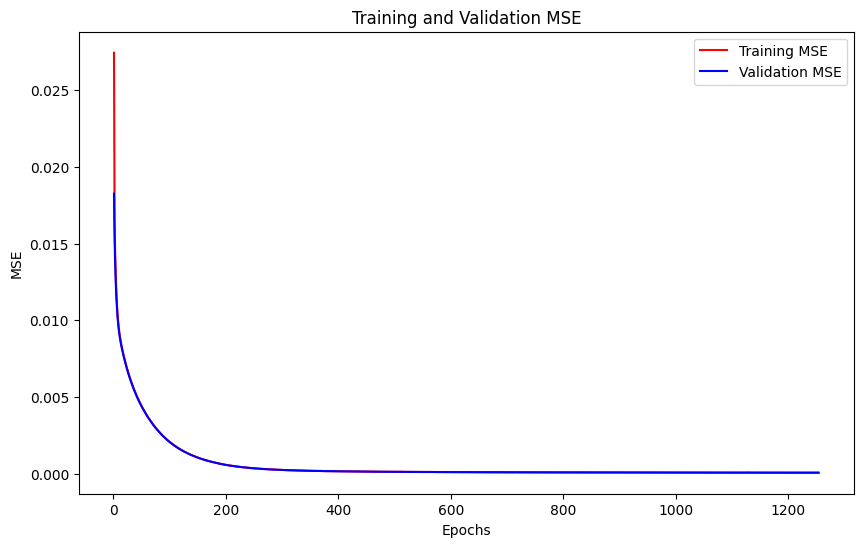

In [26]:
mae = history.history['loss']
val_mae = history.history['val_loss']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MSE')
plt.plot(epochs, val_mae, 'b', label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.show()

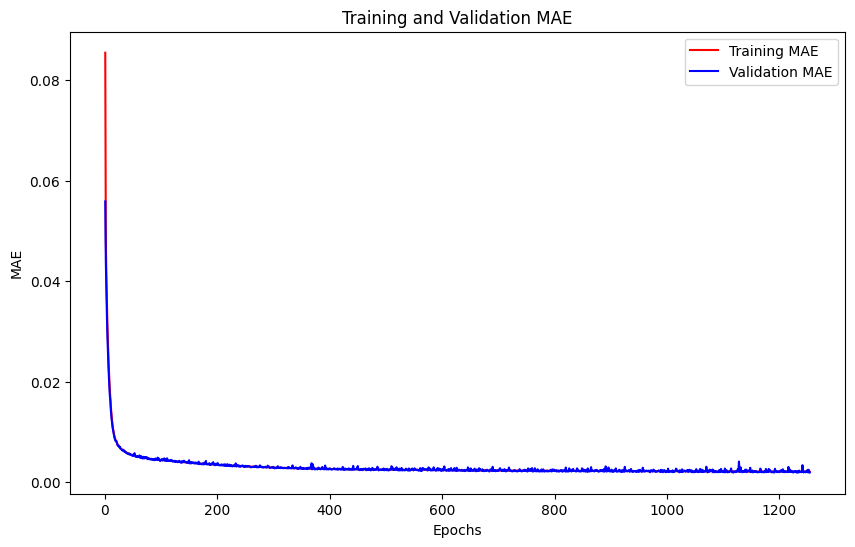

In [27]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(mae) + 1)

# MAE Diagramm
plt.figure(figsize=(10, 6))
plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()


#plt.ylim(0.00, 0.01)


plt.show()

# GridSearch

In [12]:
def build_model(learning_rate=0.00001, activation='relu', regularization=0.00001, dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(232, activation=activation, input_shape=(3,), kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(152, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(232, activation=activation, kernel_initializer='he_uniform', kernel_regularizer=l2(regularization)))
    model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mae'])
    return model

early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Verwenden Sie eine Funktion, um das Modell zu instanziieren, für scikit-learn Wrapper
model = KerasRegressor(model=build_model, verbose=2, callbacks=[early_stopping])

# Anpassung der Parameter im param_grid
param_grid = {
    'model__learning_rate': [0.00001],
    'model__regularization': [0.00001],
    'fit__batch_size': [16, 32, 64, 100],
    'fit__epochs': [100],
    'model__dropout_rate' : [0.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, verbose=2)
# Hinweis: Stellen Sie sicher, dass Ihre Daten (X_train_scaled, y_train_scaled) korrekt definiert sind
grid_result = grid_search.fit(X_train_scaled, y_train_scaled)
# Beste Parameter und Score ausgeben
print("Beste Parameter:", grid_search.best_params_)
print("Beste Genauigkeit:", grid_search.best_score_)

with open("Gridsearch_D4_t_1.txt", "w") as f:
    f.write(f"Beste Parameter: {grid_search.best_params_}\n")
    f.write(f"Beste Genauigkeit: {grid_search.best_score_}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x000001B625802E50>>
Traceback (most recent call last):
  File "C:\Users\erikm\Desktop\Diplomarbeit Erik Marr\Projekt X\venv\Lib\site-packages\ipykernel\ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
# # Funktion zum Erstellen des Modells
# def build_model(hp):
#     model = Sequential()
#     model.add(Dense(hp.Int('input_units', min_value=8, max_value=328, step=16), input_shape=(3,), activation='relu'))
#     for i in range(hp.Int('n_layers', 1, 10)):
#         model.add(Dense(hp.Int(f'units_{i}', min_value=8, max_value=328, step=16), activation='relu'))
#     model.add(Dense(1, activation='linear'))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model
# 
# # Durchführung der Random Search dreimal
# for run in range(1, 4):
#     # Anpassen des Verzeichnisses und des Projektnamens für jeden Durchlauf
#     directory = 'random_search'
#     project_name = f'random_search_D4_t_1_{run}'
# 
#     tuner = RandomSearch(
#         build_model,
#         objective='val_loss',
#         max_trials=100,
#         executions_per_trial=2,
#         directory=directory,
#         project_name=project_name
#     )
# 
#     # Durchführung des Random Search
#     tuner.search(X_train_scaled, y_train_scaled, epochs=50, verbose =0, batch_size=50, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=5)])
# 
#     # Abrufen und Speichern des besten Modells
#     best_model = tuner.get_best_models(num_models=1)[0]
#     model_path = os.path.join(directory, project_name, 'best_model.h5') 
#     best_model.save(model_path)
# 
# 
#     # Optional: Abrufen und Ausgeben der besten Hyperparameter
#     best_hyperparameters = tuner.get_best_hyperparameters()[0]
# 
#     # Konvertieren der Hyperparameter in ein DataFrame
#     df_hyperparameters = pd.DataFrame([best_hyperparameters.values])
#     # Speichern des DataFrame als CSV
#     df_hyperparameters.to_csv(f'random_search_D4_t_1_{run}.csv', index=False)
# 
#     print(f"Beste Hyperparameter für Lauf {run}: {best_hyperparameters.values}")
